In [1]:
import os
import time
import argparse
import datetime
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
from model import ConvNet, resnet
from utils import accuracy_score
import matplotlib.pyplot as plt
from utils import accuracy_score, plot_class_accuracy

In [2]:
PATH = f"./models/ResNet.pth"
transform, net = resnet()
net.load_state_dict(torch.load(PATH))
net.eval()

test_data = torchvision.datasets.Food101(root="./data",
                                    split="test",
                                    transform=transform,
                                    )

test_dataloader = torch.utils.data.DataLoader(test_data, 
                                              batch_size=128, 
                                              shuffle=False, 
                                              num_workers=4)

In [3]:
acc, class_acc = accuracy_score(net, test_dataloader, gpu=True)

In [4]:
print(f"Test Set Accuracy: {round(100*acc, 3)}%")

Test Set Accuracy: 76.76%


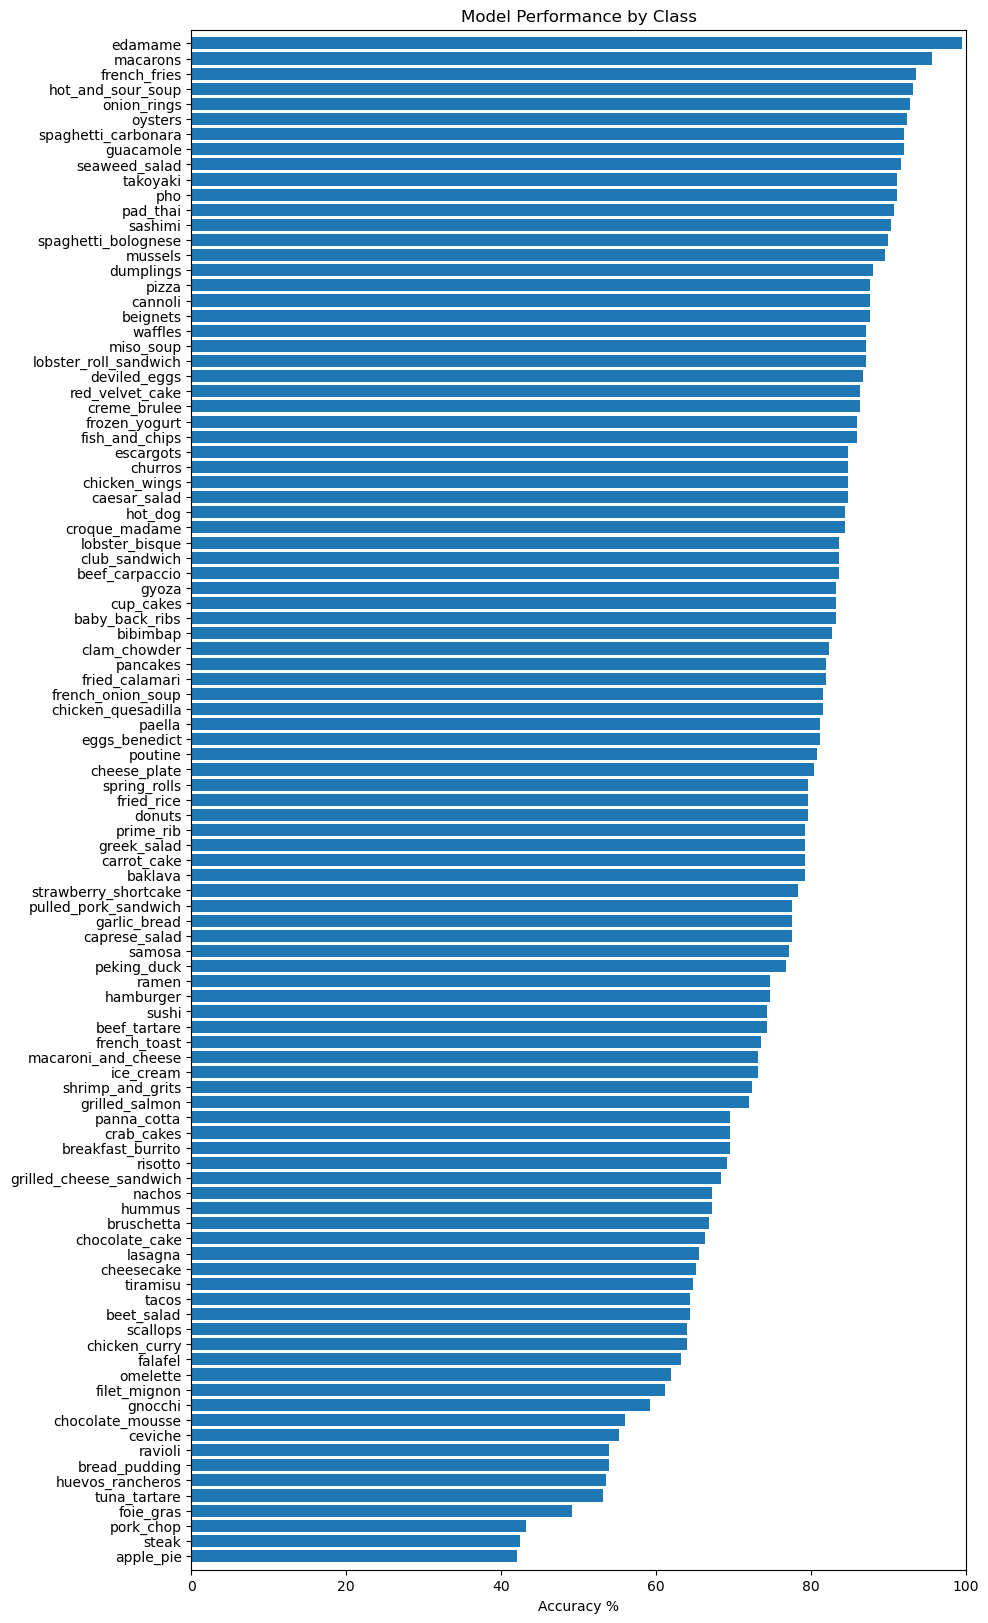

In [5]:
plot_class_accuracy(class_acc)